# Chapter 5: Random Variables, Probability, Distributions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Random Variables
Let's simulate tossing a coin 10 times

In [2]:
coindomain = [0,1]
coinprob = [.5,.5]
np.random.choice(coindomain, size=10, replace=True, p= coinprob)

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

Now, let's simulate rolling a die 15 times.

In [3]:
diedomain = range(1,7)
dieprob = np.repeat(1/6,6)
np.random.choice(diedomain, size=15, replace=True, p= dieprob)

array([4, 4, 5, 3, 1, 5, 3, 1, 1, 4, 2, 5, 4, 6, 2])

## Sample Size
Let's simulate 5 coin tosses, i.e. draw 5 sample values, and calculate the relative frequencies:

In [4]:
res1 = np.random.choice(coindomain, size=5, replace=True, p= coinprob)
pd.DataFrame(data=res1).value_counts(normalize=True)

0    0.6
1    0.4
dtype: float64

And now the same but with 1000 draws:

In [5]:
res1 = np.random.choice(coindomain, size=1000, replace=True, p=coinprob) 
pd.DataFrame(data=res1).value_counts(normalize=True)

1    0.506
0    0.494
dtype: float64

Repeat it one more time with a sample of 100,000:

In [6]:
res1 = np.random.choice(coindomain, size=100000, replace=True, p=coinprob) 
pd.DataFrame(data=res1).value_counts(normalize=True)

1    0.50005
0    0.49995
dtype: float64

Let's simulate with the die example, using sizes of 5, 1000, and 100000:

In [7]:
res2 = np.random.choice(diedomain, size=5, replace=True, p= dieprob)
pd.DataFrame(data=res2).value_counts(normalize=True).sort_index(ascending=True)

2    0.4
3    0.4
6    0.2
dtype: float64

In [8]:
res2 = np.random.choice(diedomain, size=1000, replace=True, p= dieprob)
pd.DataFrame(data=res2).value_counts(normalize=True).sort_index(ascending=True)

1    0.177
2    0.171
3    0.175
4    0.147
5    0.152
6    0.178
dtype: float64

In [9]:
res2 = np.random.choice(diedomain, size=100000, replace=True, p= dieprob)
pd.DataFrame(data=res2).value_counts(normalize=True).sort_index(ascending=True)

1    0.16589
2    0.16662
3    0.16685
4    0.16752
5    0.16727
6    0.16585
dtype: float64

## Empirical Distribution Functions

Replicate a simulating fucntion many times as much to get the empirical distribution:

In [10]:
coindomain = [0,1]
coinprob = [.5,.5]

def f1(coindomain, coinprob):
    y = np.random.choice(coindomain, size=50, replace=True, p= coinprob)
    return sum(y)

f1(coindomain, coinprob)

20

In [11]:
s1 = [f1(coindomain, coinprob) for _ in range(10000)]
edf1 = pd.DataFrame(data=s1).value_counts().sort_index(ascending=True).div(10000)
edf1

11    0.0001
12    0.0001
13    0.0005
14    0.0009
15    0.0015
16    0.0050
17    0.0093
18    0.0160
19    0.0252
20    0.0430
21    0.0590
22    0.0813
23    0.1005
24    0.1105
25    0.1090
26    0.1034
27    0.0931
28    0.0790
29    0.0577
30    0.0451
31    0.0257
32    0.0177
33    0.0085
34    0.0050
35    0.0013
36    0.0008
37    0.0006
38    0.0002
dtype: float64

Plot the empirical distribution function:

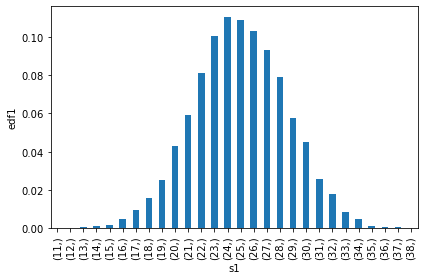

In [12]:
ax = edf1.plot(kind='bar')
ax.set_xlabel('s1')
ax.set_ylabel('edf1')
ax.get_figure().tight_layout()

Find probabilities and compare:

In [13]:
len([i for i in s1 if i <= 20]) / len(s1)

0.1016

In [14]:
len([i for i in s1 if i >= 15]) / len(s1)

0.9984

Expand the computation to a dice rolling example:

In [15]:
diedomain = range(1,7)
dieprob = np.repeat(1/6,6)

v1 = np.random.choice(diedomain, size=35, replace=True, p= dieprob)
c1 = np.cumsum(v1)
[i for i, x in enumerate(c1) if x > 35][0]

8

Apply the example to replicate a function:

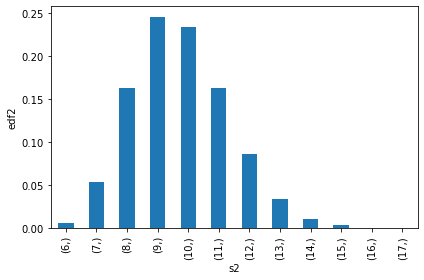

In [20]:
def f2(diedomain, dieprob):
    v1 = np.random.choice(diedomain, size=35, replace=True, p= dieprob)
    c1 = np.cumsum(v1)
    return ([i for i, x in enumerate(c1) if x > 35][0])

s2 = [f2(diedomain, dieprob) for _ in range(10000)]
edf2 = pd.DataFrame(data=s2).value_counts().sort_index(ascending=True).div(10000)
ax = edf2.plot(kind='bar')
ax.set_xlabel('s2')
ax.set_ylabel('edf2')
ax.get_figure().tight_layout()

Find the probability:

In [21]:
len([i for i in s2 if i <= 8]) / len(s2)

0.2227

## A Practical Look